# INTRODUCTION

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.The Two datasets in this project contain details of wells that are in Tanzania.


## Business Understanding

The goal is to ensure that water wells in Tanzania are functional, providing reliable access to clean water for communities. Ensuring well functionality involves understanding various factors influencing the wells' status, such as management practices, payment methods, and water quality. Effective management and maintenance strategies can be developed by identifying key determinants of well functionality, leading to improved water access for the population.

## Problem Statement
The primary problem is the high rate of non-functional water wells in Tanzania, which undermines efforts to provide safe and reliable water access. This project aims to identify the critical factors affecting well functionality, predict the status of wells using these factors, and recommend strategies to improve well management and maintenance.

## DATA PREPARATION 

In [1]:
# Importing necessary libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # for data visualization.
%matplotlib inline
import seaborn as sns  # for enhanced data visualization.
from pandas.api.types import is_numeric_dtype  # Used to check if a data type is numeric.


## Reading the Datasets

In [2]:
df1 = pd.read_csv('files/Tz water wells1.csv')
df2 = pd.read_csv('files/wells.cond.csv')

In [3]:
df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
df2.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
df1.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [6]:
# Merging target data frame with our main dataframe
data = pd.merge(df1,df2, on = 'id', how = 'inner')
data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [7]:
def inspect_data(data):
    """
    Inspect a Pandas DataFrame and print its head, tail, description, and shape.
    
    """
    print("Head:")
    print(data.head())
    print("\nTail:")
    print(data.tail())
    print("\nDescription:")
    print(data.describe())
    print("\nShape:")
    print(data.shape)
    
inspect_data(data)

Head:
      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none            0  ...          soft   
1  34.698766  -2.147466              Zahanati            0  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
4  31.130847  -1.825359               Shuleni            0  ...          soft   

  quality_group      quantity  quantit

In [8]:
# creating a function to check for duplicates.
def has_duplicates(df):
    num_duplicates = df.duplicated().sum()
    if num_duplicates == 0:
        print("There are no duplicate rows in the DataFrame.")
    else:
        print(f"There are {num_duplicates} duplicate rows in the DataFrame.")

has_duplicates(data)

There are no duplicate rows in the DataFrame.


In [9]:
# Creating function to check counts of missing values
def has_missing_values(df):
    missing_values = df.isnull().sum()
    num_missing_values = missing_values[missing_values > 0].count()
    if num_missing_values == 0:
        print("There are no missing values in the DataFrame.")
    else:
        print(f"There are {num_missing_values} columns with missing values.")
        print(missing_values[missing_values > 0])
        
has_missing_values(data)

There are 7 columns with missing values.
funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64


In [10]:
# drop all rows with missing values 
data.dropna(inplace = True )
data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
13,50495,0.0,2013-03-15,Lawatefuka Water Supply,1368,Lawatefuka water sup,37.092574,-3.181783,Kwa John Izack Mmari,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
14,53752,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59381,67885,0.0,2011-03-16,Mkinga Distric Coun,0,DWE,38.835001,-4.880204,Mijohoroni,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
59382,47002,6.0,2013-08-03,Ces(gmbh),1383,DWE,37.454759,-3.323599,Kwa Luka Msaki,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
59391,44885,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [11]:
# check column types
data.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [12]:
# 1. Data Type Conversion
data['date_recorded'] = pd.to_datetime(data['date_recorded'])

# 2. Outliers Detection and Handling
for column in ['amount_tsh', 'gps_height', 'longitude', 'latitude']:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[column] = np.where(data[column] < lower_bound, q1, data[column])
    data[column] = np.where(data[column] > upper_bound, q3, data[column])

# 3. Data Consistency
categorical_columns = ['funder', 'installer', 'basin', 'region', 'lga', 'ward', 'scheme_management', 'extraction_type', 'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type', 'status_group']
for column in categorical_columns:
    data[column] = data[column].str.lower()

# 4. Feature Engineering
data['recorded_year'] = data['date_recorded'].dt.year
data['recorded_month'] = data['date_recorded'].dt.month

# 5. Dropping Irrelevant or Redundant Columns
columns_to_drop = ['id', 'wpt_name', 'num_private', 'subvillage', 'region_code', 'recorded_by', 'scheme_name', 'extraction_type_group', 'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group']
data.drop(columns=columns_to_drop, inplace=True)

# 6. Normalization/Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['amount_tsh', 'gps_height', 'population']] = scaler.fit_transform(data[['amount_tsh', 'gps_height', 'population']])

# Display the cleaned data
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27813 entries, 0 to 59396
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   amount_tsh         27813 non-null  float64       
 1   date_recorded      27813 non-null  datetime64[ns]
 2   funder             27813 non-null  object        
 3   gps_height         27813 non-null  float64       
 4   installer          27813 non-null  object        
 5   longitude          27813 non-null  float64       
 6   latitude           27813 non-null  float64       
 7   basin              27813 non-null  object        
 8   region             27813 non-null  object        
 9   district_code      27813 non-null  int64         
 10  lga                27813 non-null  object        
 11  ward               27813 non-null  object        
 12  population         27813 non-null  float64       
 13  public_meeting     27813 non-null  object        
 14  scheme

(None,
     amount_tsh date_recorded                   funder  gps_height  \
 0     0.500000    2011-03-14                    roman    0.544518   
 2     0.083333    2013-02-25             lottery club    0.285504   
 5     0.066667    2011-03-13      mkinga distric coun    0.033113   
 13    0.000000    2013-03-15  lawatefuka water supply    0.536424   
 14    0.000000    2012-10-20                    biore    0.033113   
 
                installer  longitude  latitude       basin       region  \
 0                  roman  34.938093 -9.856322  lake nyasa       iringa   
 2           world vision  37.460664 -3.821329     pangani      manyara   
 5                    dwe  39.172796 -4.765587     pangani        tanga   
 13  lawatefuka water sup  37.092574 -3.181783     pangani  kilimanjaro   
 14                wedeco  34.364073 -3.629333    internal    shinyanga   
 
     district_code  ... extraction_type   management         payment  \
 0               5  ...         gravity        

## EXPLORATORY DATA ANALYSIS

### a) Univariate Analysis

#### 1. Distribution of Well Status (status_group)

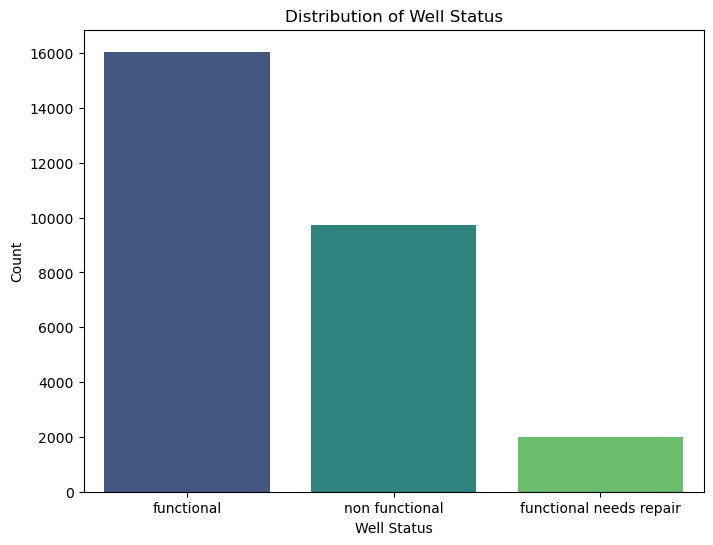

In [14]:
# Distribution of Well Status
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='status_group', palette='viridis')
plt.title('Distribution of Well Status')
plt.xlabel('Well Status')
plt.ylabel('Count')
plt.show()

This plot shows the count of wells categorized by their status. It indicates the proportion of functional and non-functional wells.

Insight: There are more functional wells compared to non-functional ones.

#### 2. Distribution of Regions (region)

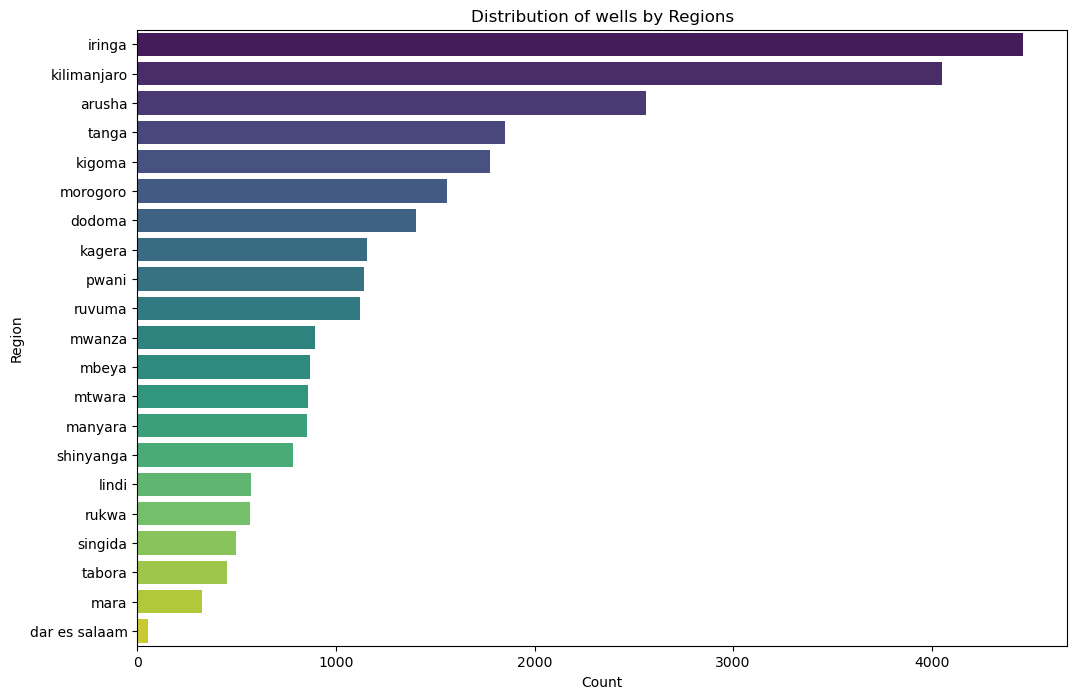

In [15]:
# Distributions of regions 
plt.figure(figsize=(12,8))
sns.countplot(data=data, y='region', palette = 'viridis', order=data['region'].value_counts().index)
plt.title('Distribution of wells by Regions')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

This plot displays the number of wells in each region. It helps understand the geographical distribution of wells.

Insight : The regions with the highest number of wells are shown, with Iringa, Manyara, and Tanga being prominent.

### Distribution of Management Types

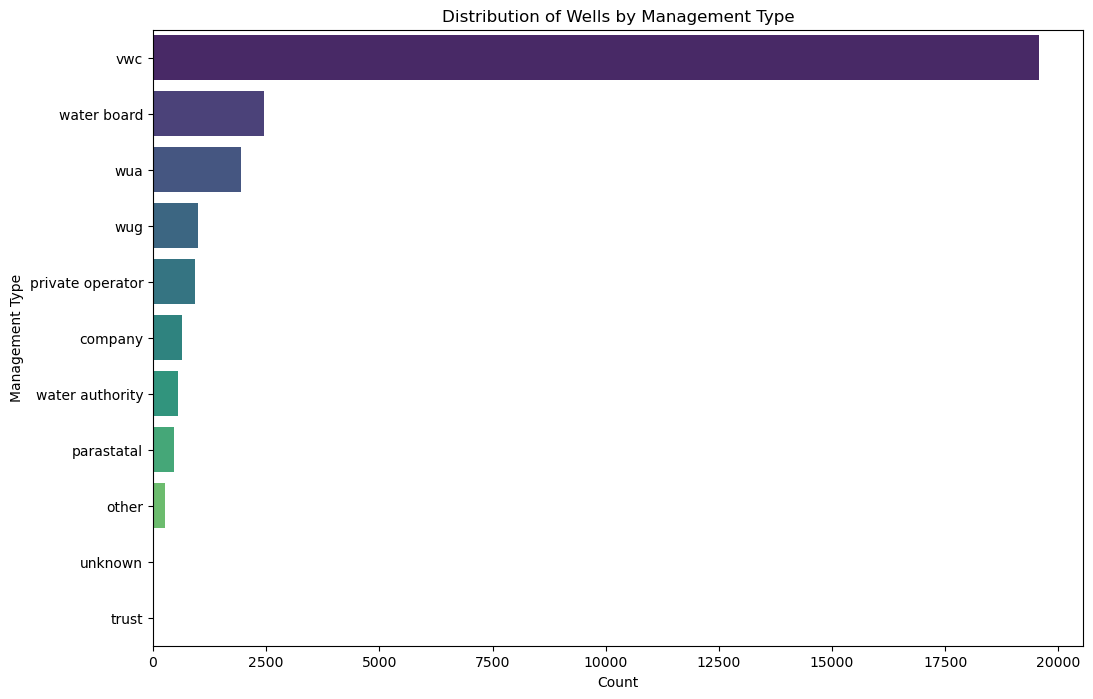

In [16]:
# Distribution of Management Types
plt.figure(figsize=(12, 8))
sns.countplot(data=data, y='management', palette='viridis', order=data['management'].value_counts().index)
plt.title('Distribution of Wells by Management Type')
plt.xlabel('Count')
plt.ylabel('Management Type')
plt.show()


Some management types are more prevalent, potentially impacting the functionality rates of the wells they oversee.

### Distribution of payment types

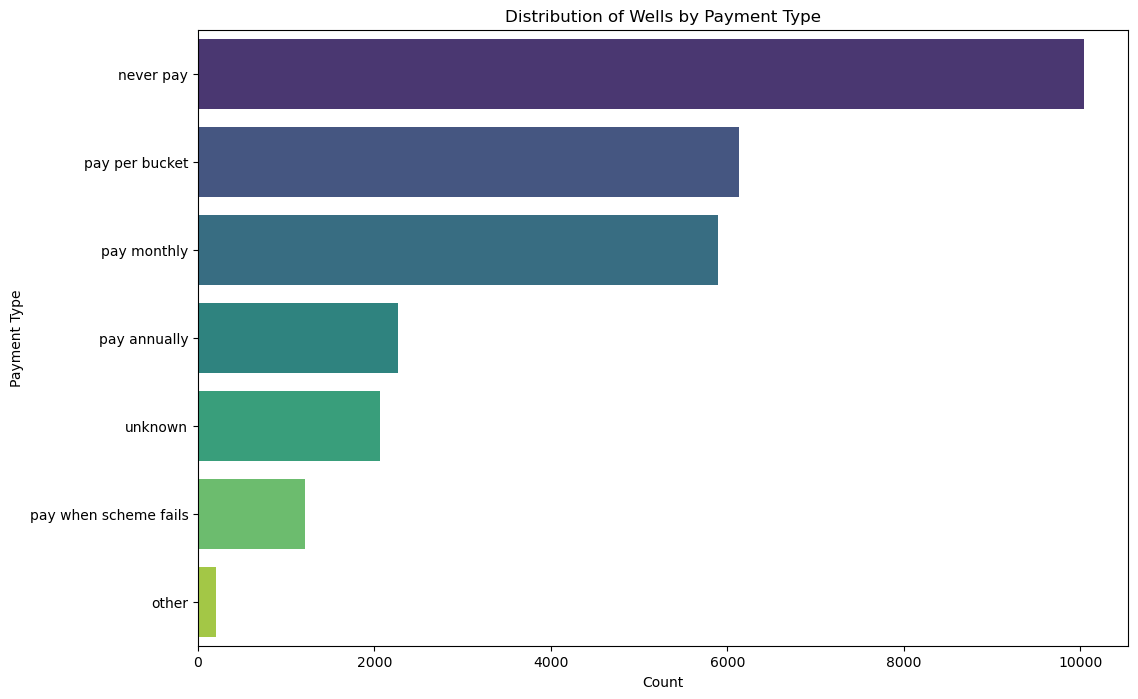

In [18]:
# distribution of payment types
plt.figure(figsize=(12, 8))
sns.countplot(data=data, y='payment', palette='viridis', order=data['payment'].value_counts().index)
plt.title('Distribution of Wells by Payment Type')
plt.xlabel('Count')
plt.ylabel('Payment Type')
plt.show()

This plot shows the distribution of payment types used for accessing the wells. Different payment models might influence the maintenance and operational status of the wells.

### b) Bivariate Analysis

#### 3. Well Status by Region

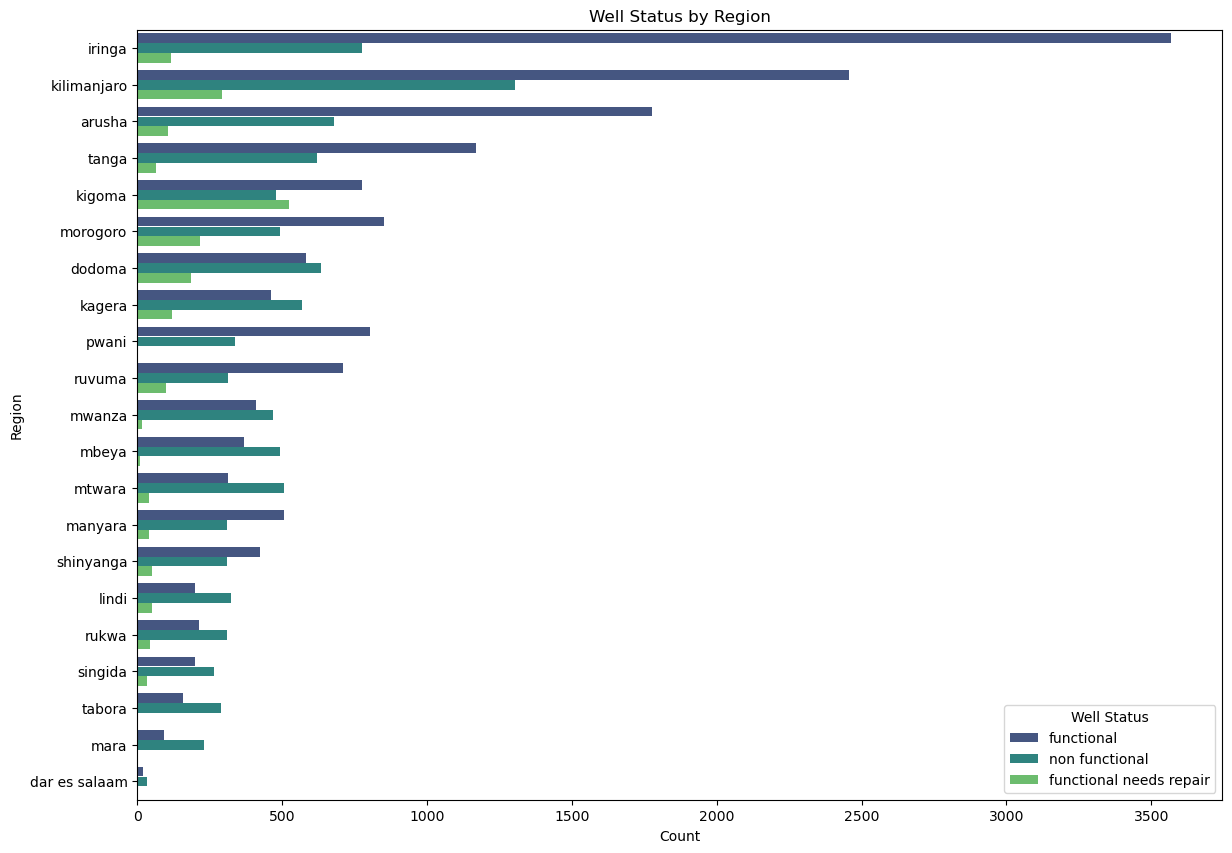

In [20]:
# Well Status by Region
plt.figure(figsize=(14, 10))
sns.countplot(data=data, y='region', hue='status_group', palette='viridis', order=data['region'].value_counts().index)
plt.title('Well Status by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.legend(title='Well Status')
plt.show()


This plot shows the well status distribution across different regions.

Insight: The distribution of functional and non-functional wells varies by region. Some regions have a higher proportion of functional wells compared to others.

#### 4. Payment Type and Well Status

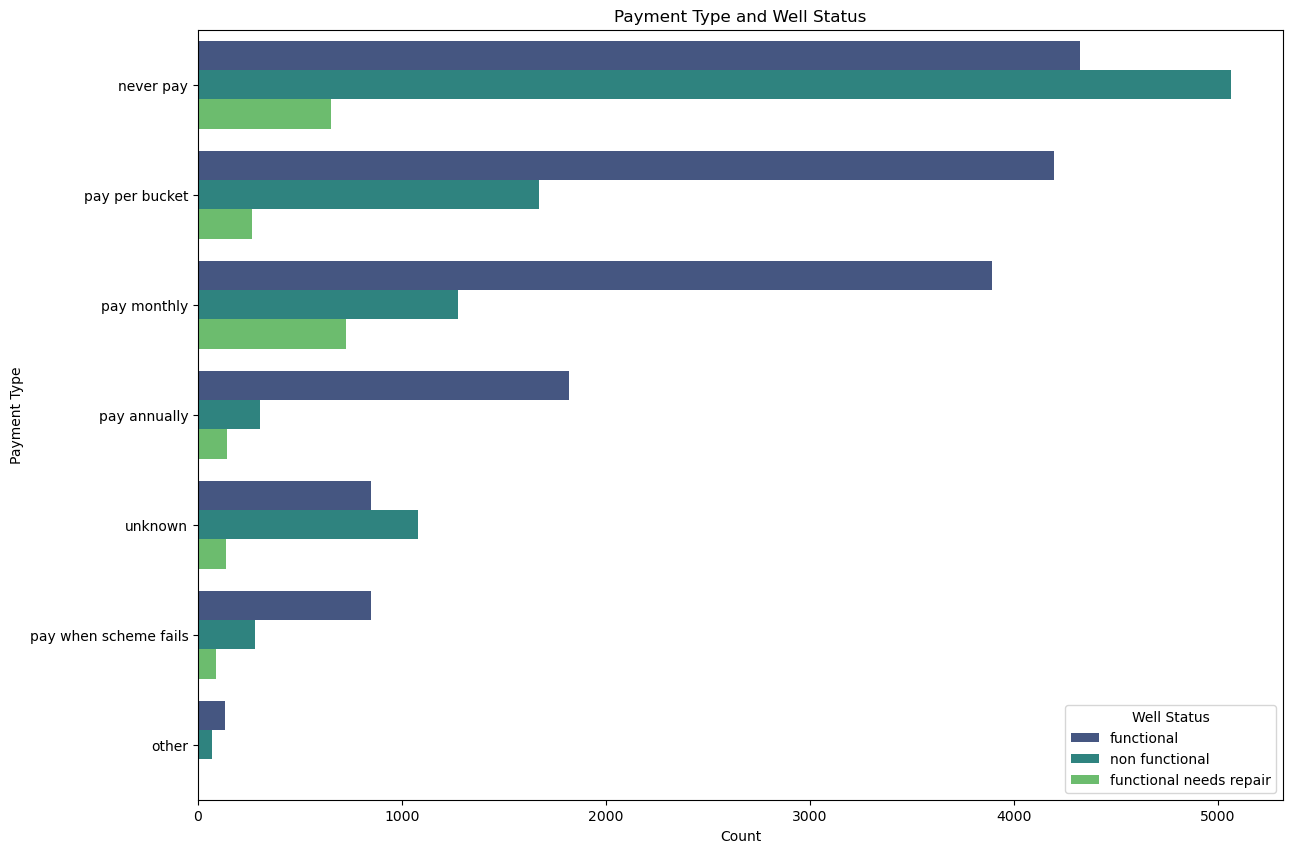

In [21]:
# Payment Type and Well Status
plt.figure(figsize=(14, 10))
sns.countplot(data=data, y='payment', hue='status_group', palette='viridis', order=data['payment'].value_counts().index)
plt.title('Payment Type and Well Status')
plt.xlabel('Count')
plt.ylabel('Payment Type')
plt.legend(title='Well Status')
plt.show()

This plot examines the relationship between payment type and well status.

Insight: Different payment types have varying distributions of functional and non-functional wells. For instance, wells where users pay annually or per bucket tend to be more functional.

### 5.Well Status by Water Quality

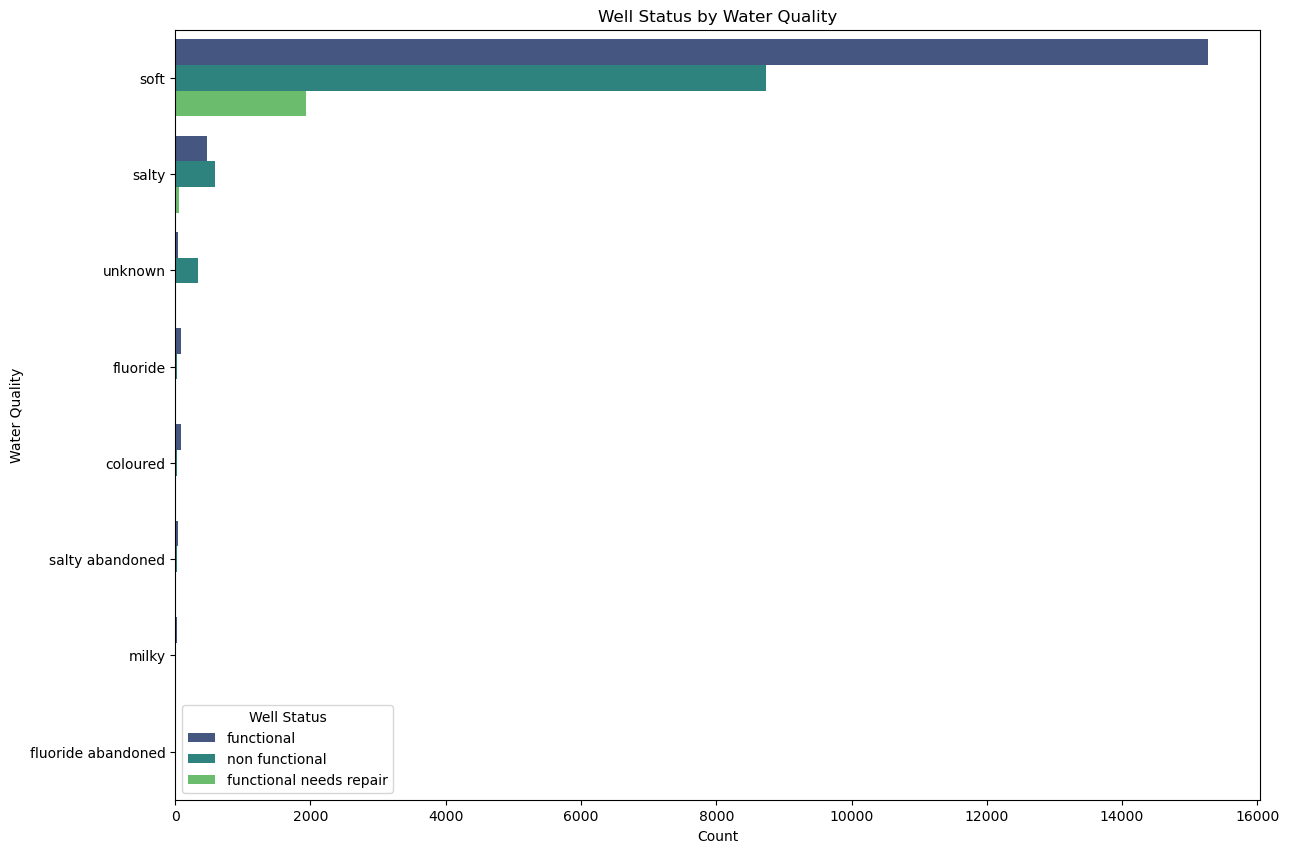

In [22]:
# Well Status by Water Quality
plt.figure(figsize=(14, 10))
sns.countplot(data=data, y='water_quality', hue='status_group', palette='viridis', order=data['water_quality'].value_counts().index)
plt.title('Well Status by Water Quality')
plt.xlabel('Count')
plt.ylabel('Water Quality')
plt.legend(title='Well Status')
plt.show()

The plot explores the relationship between water quality and well status. Wells providing high-quality water might be better maintained, affecting their functionality.

### c) Multivariate Analysis

#### Well Status by Region and Management

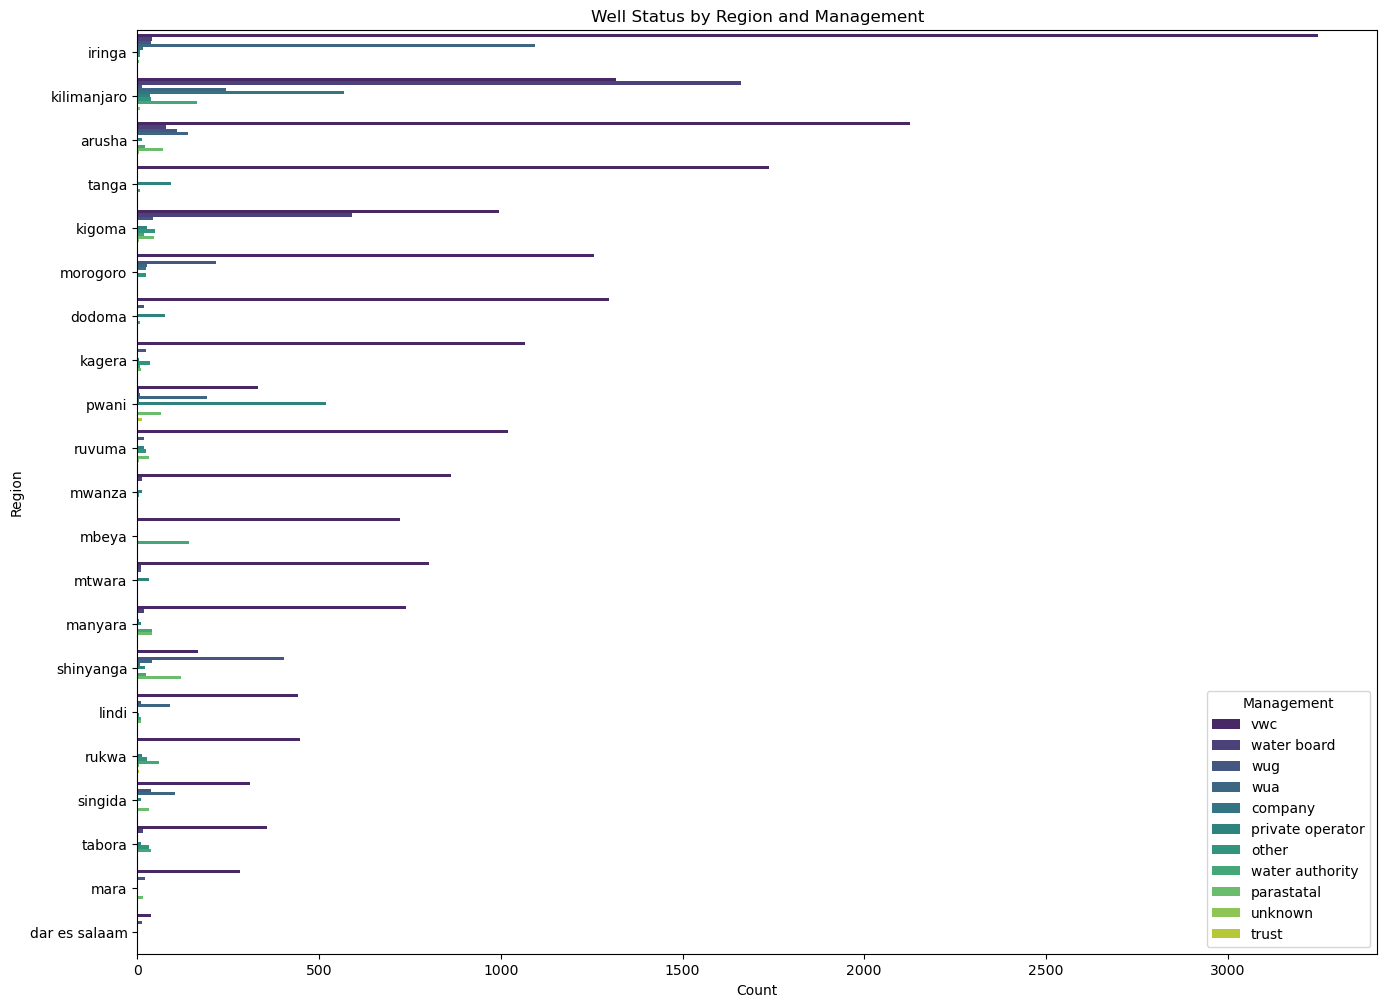

In [23]:
# Well Status by Region and Management
plt.figure(figsize=(16, 12))
sns.countplot(data=data, y='region', hue='management', palette='viridis', dodge=True, order=data['region'].value_counts().index)
plt.title('Well Status by Region and Management')
plt.xlabel('Count')
plt.ylabel('Region')
plt.legend(title='Management')
plt.show()


This plot explores the relationship between well status, region, and management type.

Insight: The management type also impacts the well status distribution across regions. Some management types are more prevalent in certain regions and correlate with higher functionality.